# Computer Vision HW2
Lecture 2. Digital Image Processing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## 1
Fig3.9(a) 영상에 대해 오른쪽과 같은 결과가 나오도록 여러가지 경우에 대해 실험하고, 결과를 분석해보세요. [실험영상](https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif)

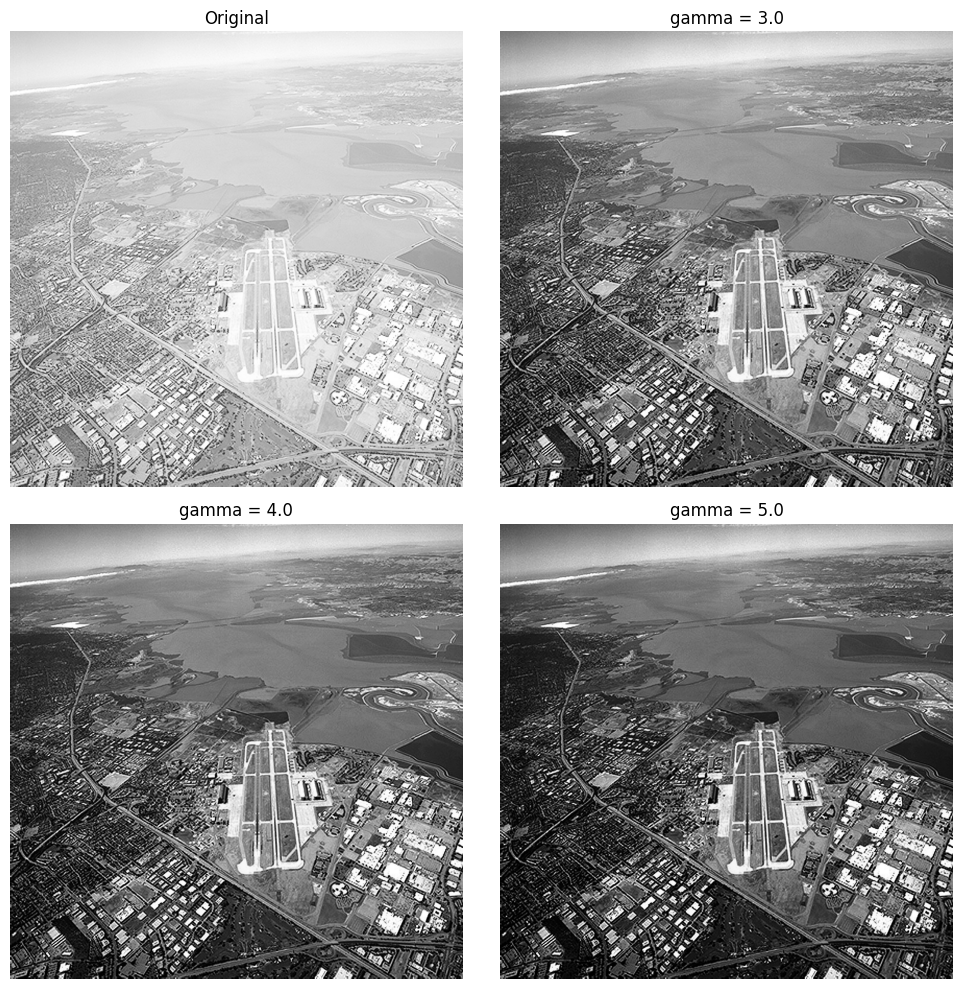

In [2]:
img = cv2.imread('Fig0309.tif', cv2.IMREAD_GRAYSCALE)

gams = [3.0, 4.0, 5.0]

# 감마 보정
def gamma(f, gamma=1.0):
    f1 = f / 255.0
    return np.uint8(255 * (f1 ** gamma))

# 출력
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')

for i, gf in enumerate(gams, 2):
    plt.subplot(2, 2, i)
    plt.imshow(gamma(img, gf), cmap='gray')
    plt.axis('off')
    plt.title(f'gamma = {gf}')

plt.tight_layout()
plt.show()


### **분석**
감마 보정 수식 $s = c \cdot r^{\gamma}$ 에 따라서 밝은 부분이 $\gamma$ 가 증가함에 따라 어두워 지는 것을 확인할 수 있다.

## 2
Fig3.10(a) 영상에 대해 오른쪽과 같은 결과가 나오도록 여러가지 경우에 대해 실험하고, 결과를 분석해보세요.
[실험영상](https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif)

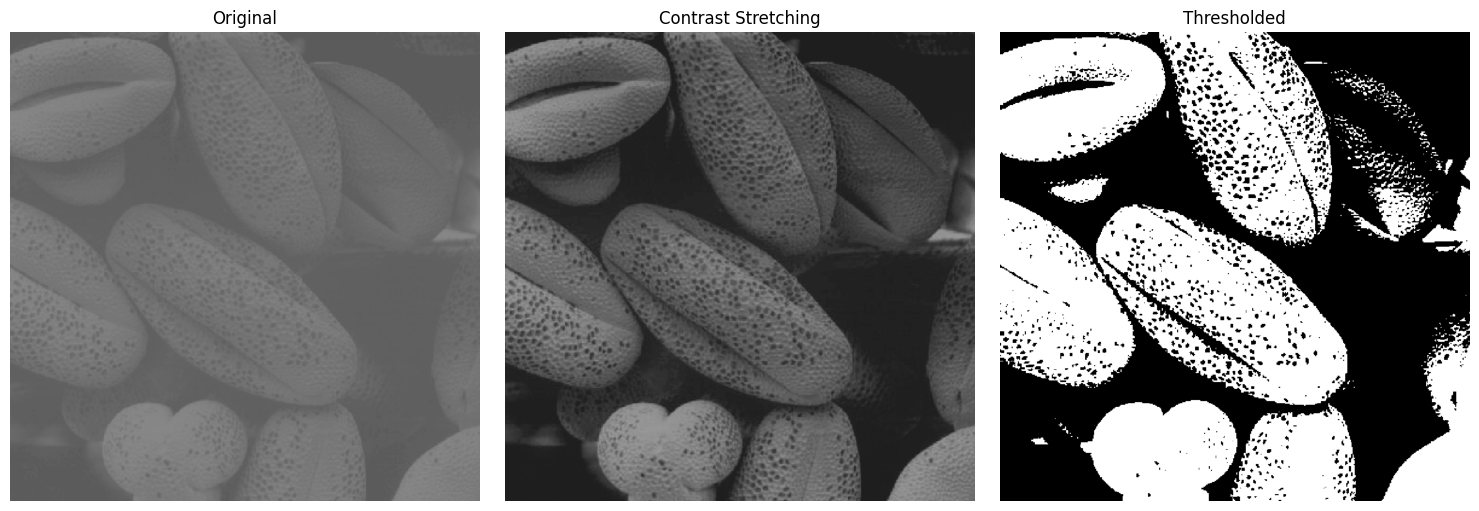

In [3]:
img = cv2.imread('Fig0310.tif')

L = 255

# 구간별 선형 변환
def contrast_stretching(img, r1, s1, r2, s2):
    result = np.zeros_like(img, dtype=np.uint8)
    
    mask1 = (img < r1)
    result[mask1] = (s1 / r1 * img[mask1]).astype(np.uint8)

    mask2 = (img >= r1) & (img <= r2)
    result[mask2] = (s1 + ((img[mask2] - r1) * (s2 - s1) / (r2 - r1))).astype(np.uint8)

    mask3 = (img > r2)
    result[mask3] = (s2 + ((L - 1 - s2) / (L - 1 - r2) * (img[mask3] - r2))).astype(np.uint8)

    return result

# Thresholding 이진화
def threshold_img(img, T):
    result = np.zeros_like(img, dtype=np.uint8)
    result[img >= T] = 255
    return result

s1, s2 = L / 8, 7 * L / 8 # 임의 지정
r1, r2 = 3 * L / 8, 5 * L / 8 # 임의 지정

con_img = contrast_stretching(img, r1, s1, r2, s2)
th_img = threshold_img(con_img, 75)

# 출력
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(con_img, cmap='gray')
plt.axis('off')
plt.title('Contrast Stretching')

plt.subplot(1, 3, 3)
plt.imshow(th_img, cmap='gray')
plt.axis('off')
plt.title('Thresholded')
plt.tight_layout()
plt.show()

### 분석
히스토그램을 바탕으로 함수를 만들고 처리를 진행함.
r1, r2, s1, s2의 값은 히스토그램 상 임의로 지정하였음

Threshold를 75부근으로 두었을 때 예시와 비슷한 결과를 얻을 수 있었음

## 3
임의의 영상을 입력 받아 아래와 같은 마스크를 사용하여 컨볼루션 하고, 그 결과를 분석해보세요.

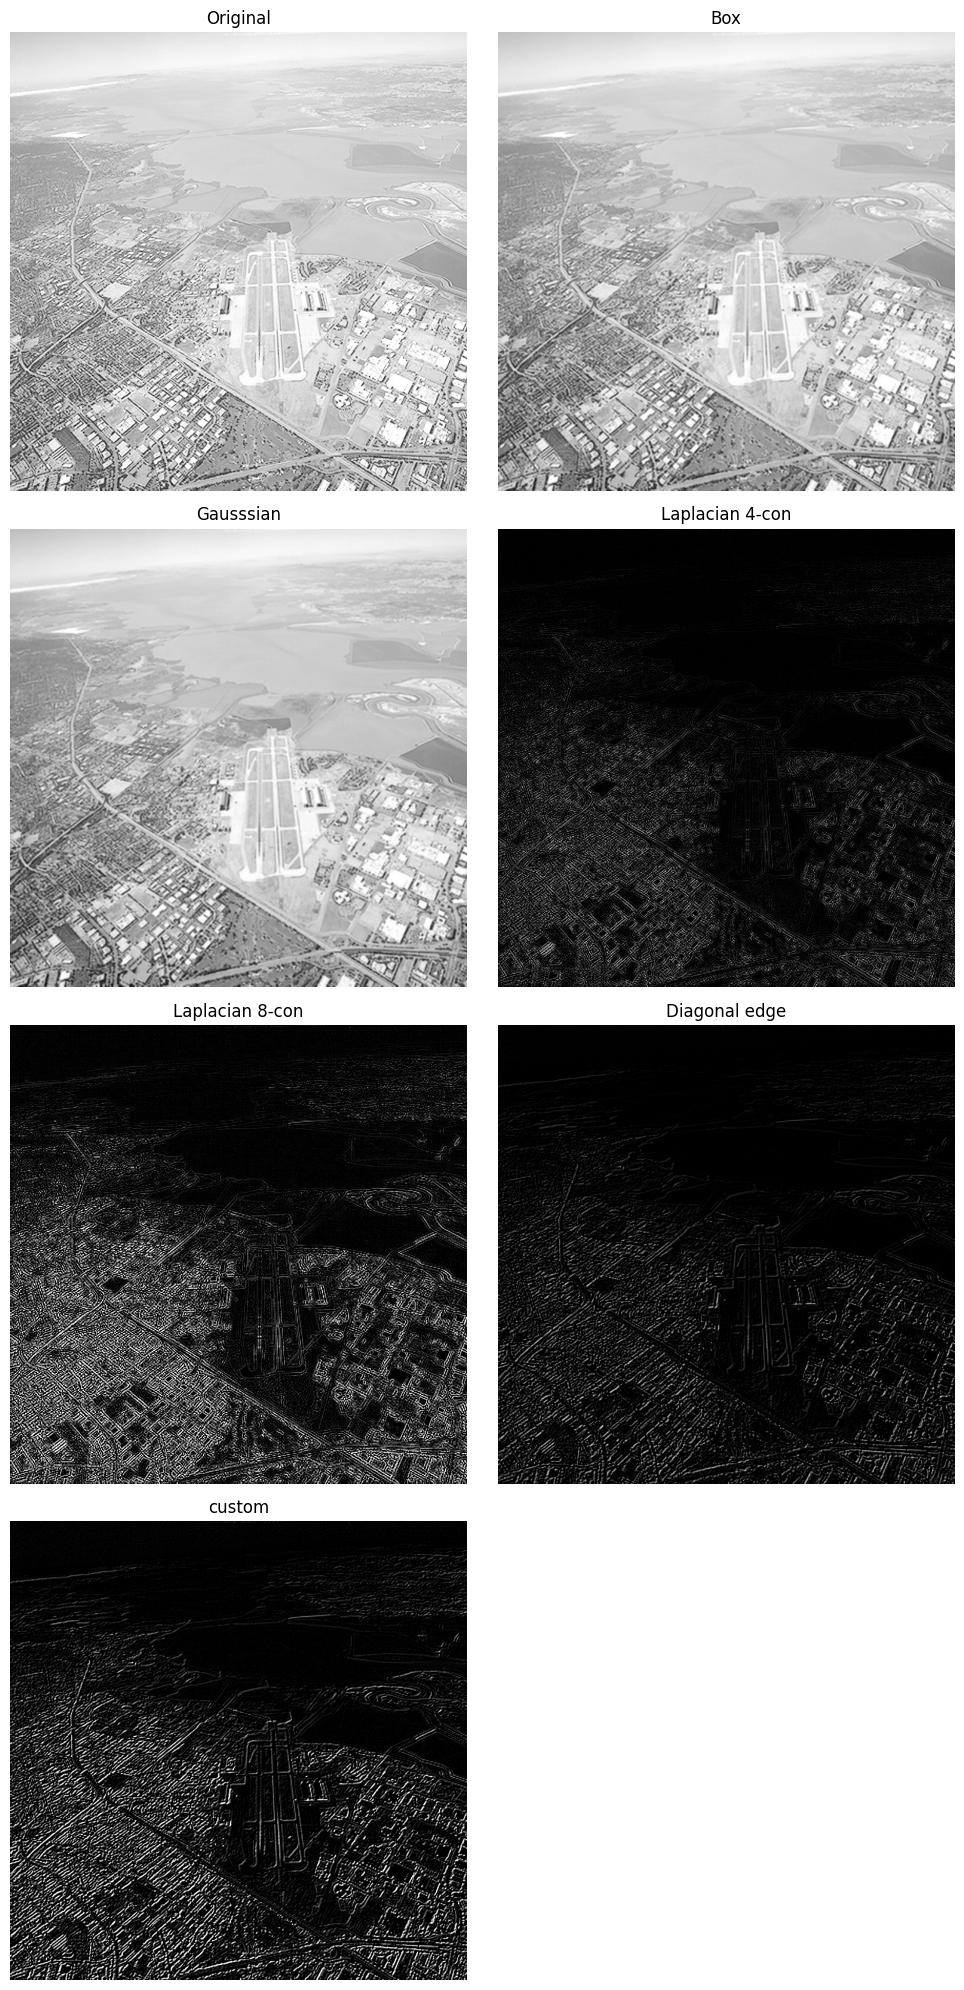

In [4]:
img = cv2.imread('Fig0309.tif', cv2.IMREAD_GRAYSCALE)
masks = {
    'Box' : np.array([
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9]
        ]),
    'Gausssian' : np.array([
        [0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
        [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
        [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
        [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
        [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]
        ]),
    'Laplacian 4-con' : np.array([
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]
        ]),
    'Laplacian 8-con' : np.array([
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]
        ]),
    'Diagonal edge' : np.array([
        [-1, 0, 0],
        [0, 0, 0],
        [0, 0, 1]
        ]),
    'custom' : np.array([
        [-1, -1, 0],
        [-1, 0, 1],
        [0, 1, 1]
        ])
}

# 출력
plt.figure(figsize=(10, 20))

plt.subplot(4, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')


for i, (name, mask) in enumerate(masks.items(), 2):
    filtered = cv2.filter2D(img, -1, mask) # convolution
    plt.subplot(4, 2, i)
    plt.imshow(filtered, cmap='gray')
    plt.axis('off')
    plt.title(name)

plt.tight_layout()
plt.show()

### 분석

문제의 마스크들은 다음과 같음

1. Box mask
2. Gaussian mask
3. Laplacian 4-connected
4. Laplacian 8-connected
5. 대각선 (우하향) 엣지
6. 비대칭 엣지

## 4
아래와 같은 영상에 대하여 45°, -45° 방향의 대각선 edge를 검출하되, Sobel 연산자를 변형하여 적절한 마스크를 만들어 적용해보세요. [실험영상](https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg)

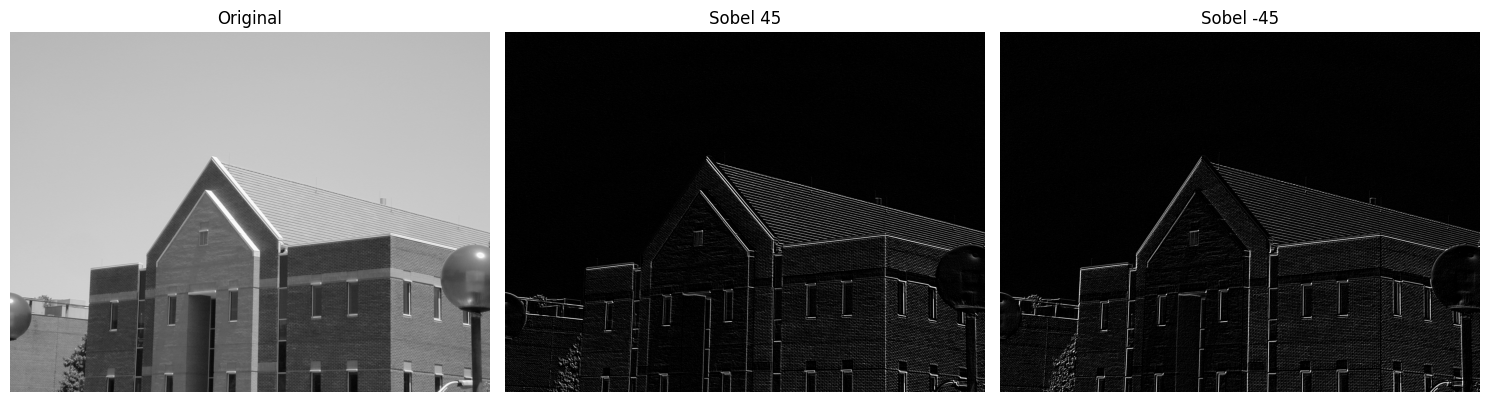

In [5]:
img = cv2.imread('School.jpg', cv2.IMREAD_GRAYSCALE)

sobel_45 = np.array([[1, 0, 2],
                     [-1, 0, 1],
                     [-2, -1, 0]])
sobel_n45 = np.array([[2, 1, 0],
                      [1, 0, -1],
                     [0, -1, -2]])


img_sobel_45 = cv2.filter2D(img, -1, sobel_45)
img_sobel_n45 = cv2.filter2D(img, -1, sobel_n45)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(img_sobel_45, cmap='gray')
plt.axis('off')
plt.title('Sobel 45')
plt.subplot(1, 3, 3)
plt.imshow(img_sobel_n45, cmap='gray')
plt.axis('off')
plt.title('Sobel -45')

plt.tight_layout()
plt.show()

## 5
왼쪽의 지문영상을 오른쪽 영상과 같이 개선해보세요. 수업시간에 배운 방법을 기본적으로 적용해보고, 더 좋은 방법이 있으면 해당 방법도 적용하고 결과를 분석해보세요.[실험영상](https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg)

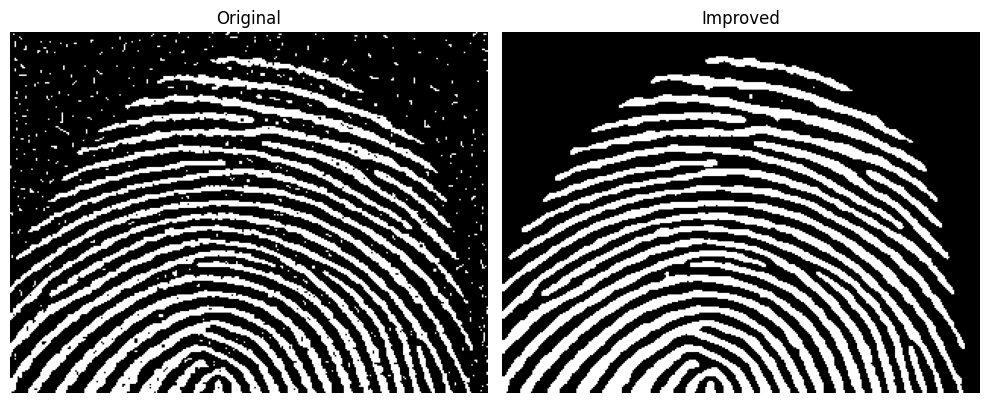

In [6]:
img = cv2.imread('Finger.jpg', cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(img, (7, 7), 0)
_, bin = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(bin, cmap='gray')
plt.axis('off')
plt.title('Improved')

plt.tight_layout()
plt.show()

### 분석
1. 가우시안 블러를 사용하여 노이즈를 제거한 후
2. OTSU Threshold를 사용한 결과로도 충분히 효과 좋은 개선이 가능하였다

## 6
다음 영상에서 원하는 선분을 없애 보시고, 어떻게 했는지 분석하세요

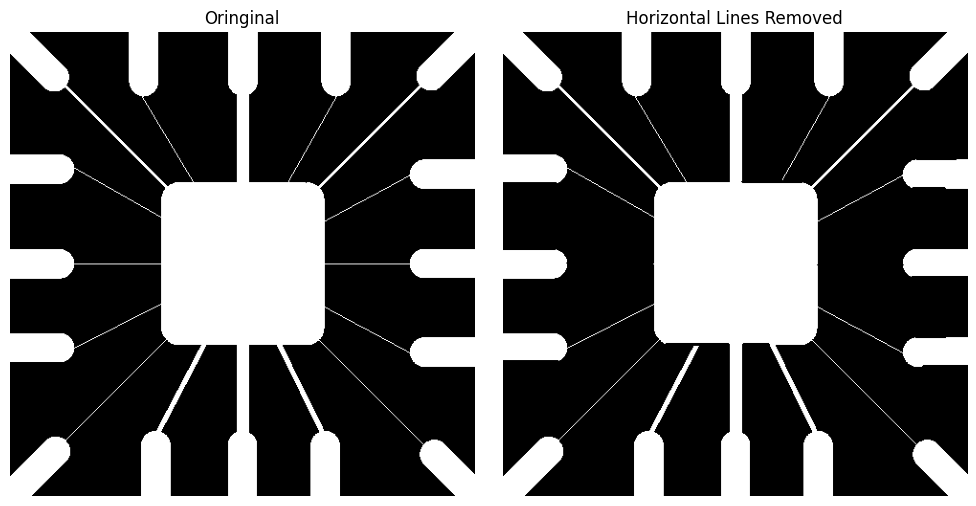

In [7]:
img = cv2.imread('wirebond-mask.tif', cv2.IMREAD_GRAYSCALE)

_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

edges = cv2.Canny(binary, 50, 150, apertureSize=3)

lines = cv2.HoughLinesP(
    edges, rho=1, theta=np.pi/180, threshold=60, minLineLength=20, maxLineGap=7)

horizontal_removed = binary.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if abs(y2 - y1) <= 2:
            cv2.line(horizontal_removed, (x1, y1), (x2, y2), 0, thickness=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Oringinal')
plt.subplot(1, 2, 2)
plt.imshow(horizontal_removed, cmap='gray')
plt.axis('off')
plt.title('Horizontal Lines Removed')

plt.tight_layout()
plt.show()

### 분석

Canny Edges를 사용하여 엣지를 검출한 다음, HoughLines를 사용하여 수평방향, 설정한 값의 두깨의 선분을 찾은 다음 제거한다

## 7
아래의 Edge 검출 알고리즘 사용하여 edge를 검출하고, 각각 결과가 어떻게 다른 지 비교하세요.
- Sobel
- Laplacian
- Canny
- Morphological Gradient

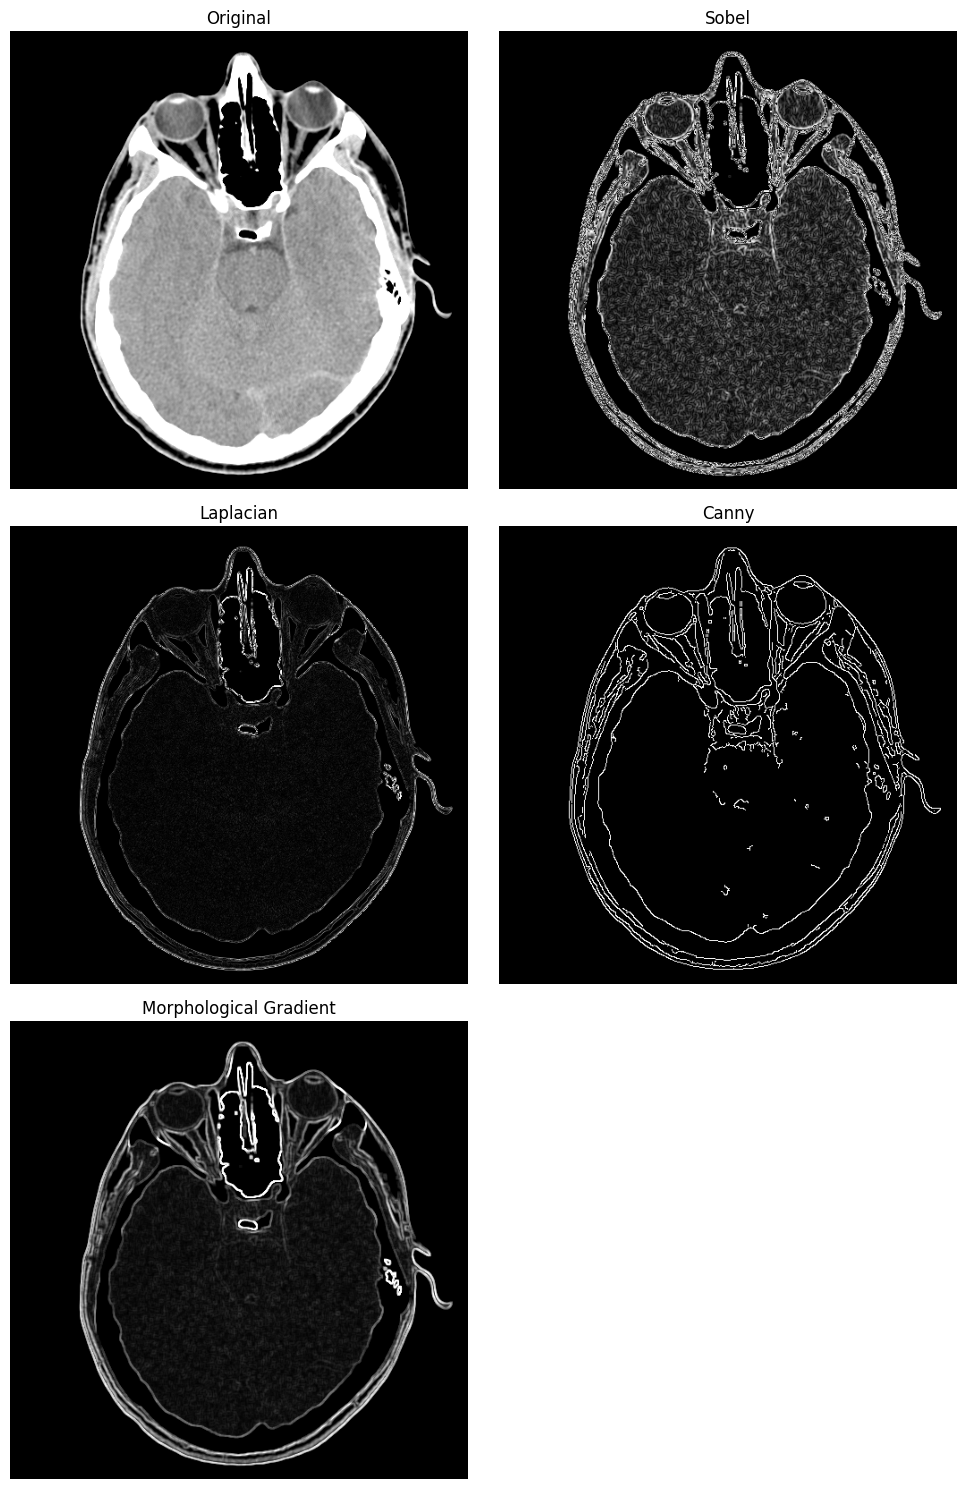

In [8]:
img = cv2.imread('headCT-Vandy.tif', cv2.IMREAD_GRAYSCALE)

# Sobel
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = np.uint8(sobel)

# Laplacian
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

# Canny
canny = cv2.Canny(img, 100, 200)

# Morphological Gradient
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morph_gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

# 출력
plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(3, 2, 2)
plt.imshow(sobel, cmap='gray')
plt.axis('off')
plt.title('Sobel')
plt.subplot(3, 2, 3)
plt.imshow(laplacian, cmap='gray')
plt.axis('off')
plt.title('Laplacian')
plt.subplot(3, 2, 4)
plt.imshow(canny, cmap='gray')
plt.axis('off')
plt.title('Canny')
plt.subplot(3, 2, 5)
plt.imshow(morph_gradient, cmap='gray')
plt.axis('off')
plt.title('Morphological Gradient')
plt.tight_layout()
plt.show()

## 8
아래의 알고리즘을 사용하여 노이즈라 생각되는 영역을 지우고, 각각 결과가 어떻게 다른 지 비교분석하세요
- Morphological smoothing
- Smoothing Filter

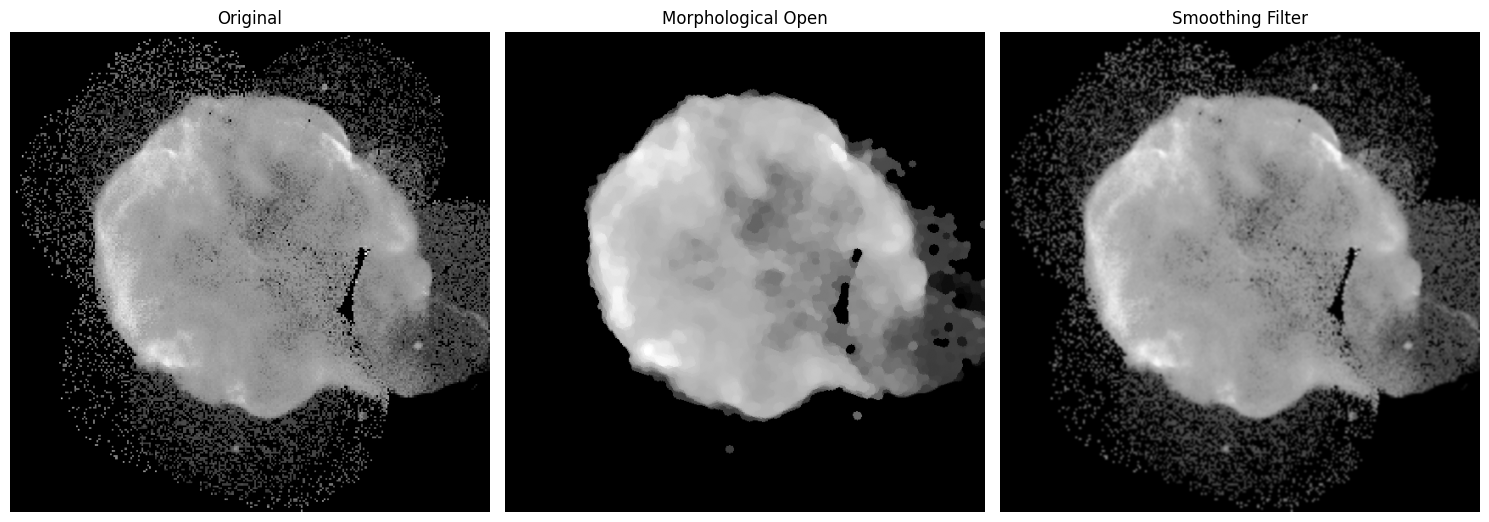

In [9]:
img = cv2.imread('Fig0938.tif', cv2.IMREAD_GRAYSCALE)

# Morphological Smoothing
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
morph_smooth = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
morph_smooth = cv2.morphologyEx(morph_smooth, cv2.MORPH_CLOSE, kernel)

# Gaussian Smoothing
blurred = cv2.GaussianBlur(img, (5, 5), 0)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(morph_smooth, cmap='gray')
plt.axis('off')
plt.title('Morphological Open')
plt.subplot(1, 3, 3)
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.title('Smoothing Filter')
plt.tight_layout()
plt.show()


### 분석
- Morphological Smoothing의 경우, ELLIPSE를 사용하여 Opened -> Closed 방식을 사용
    - 구조의 크기를 늘려 바깥의 작은 점들을 없애기에는 충분하였으나, 전체적인 이미지가 뭉게지는것을 확인할 수 있었다.
- Smoothing Filter의 경우, Gaussian Smoothing을 사용
    - 전체적인 형태, 정보를 유지하는 것은 가능하지만, 작은점들 전체를 노이즈라고 판단했을 경우에는, 처리에 어려움이 있음을 확인할 수 있다.

## 9
다음 영상을 이진화하되, 수업시간에 배운 2가지 방법을 모두 써보고, 각각의 결과에 대해 비교 분석하시오

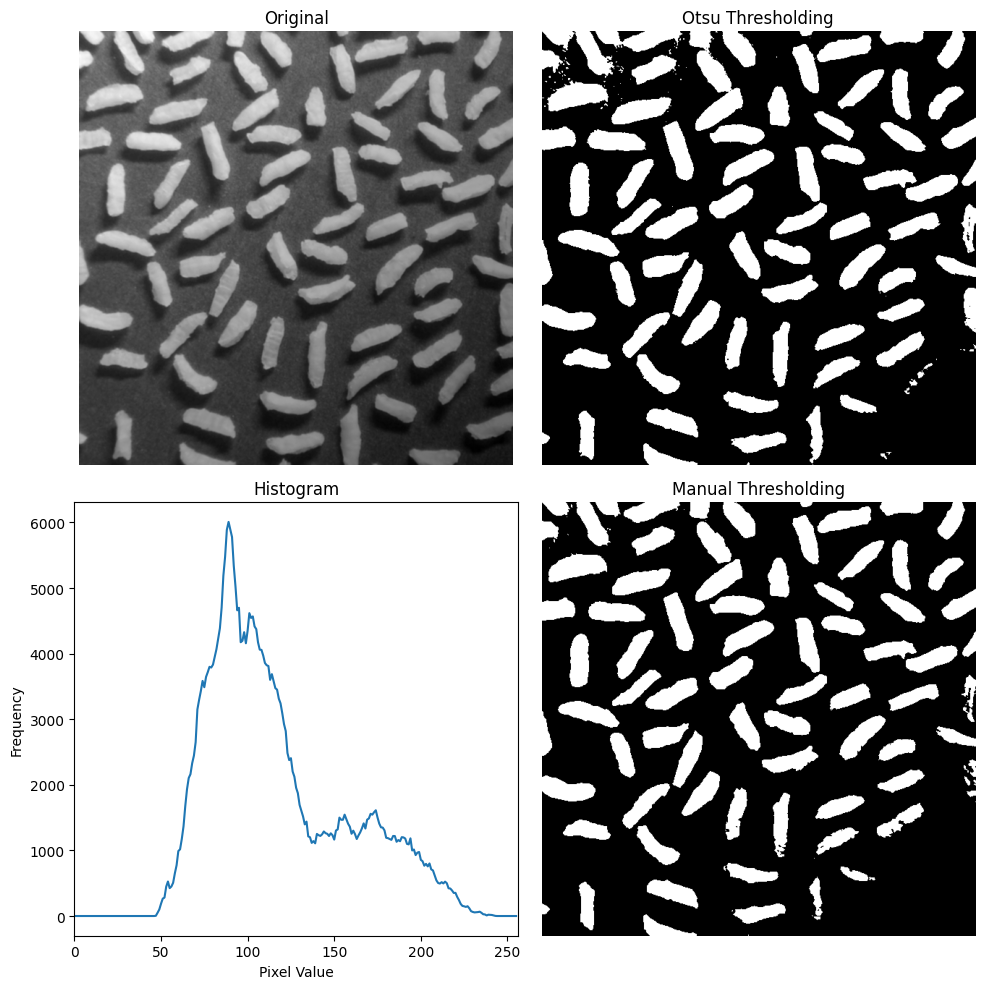

In [10]:
img = cv2.imread('Fig0940.tif', cv2.IMREAD_GRAYSCALE)

# Otsu
_, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Histogram Binarization
manual_T = 140
_, man = cv2.threshold(img, manual_T, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(2, 2, 2)
plt.imshow(otsu, cmap='gray')
plt.axis('off')
plt.title('Otsu Thresholding')
plt.subplot(2, 2, 3)
plt.plot(hist)
plt.xlim([0, 256])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.subplot(2, 2, 4)
plt.imshow(man, cmap='gray')
plt.axis('off')
plt.title('Manual Thresholding')
plt.tight_layout()
plt.show()

### 분석
이진화에는
- Otsu
- Histogram을 사용한 수동 Threshloding

두가지 방식을 사용하였다

히스토그램을 사용하여 계곡으로 보이는 140을 값으로 사용하였다.

두 방법의 결과가 크게 차이 나지 않는것을 보아 Threshold 값이 유사하게 설정된 것을 확인 할 수 있다. 그러나 우 하단과 좌 상단을 비교하였을때 약간의 차이가 존재함도 확인할 수 있곘다

## 10
다음 영상을 Morphology를 적용하여 오른쪽과 같이 분할하세요

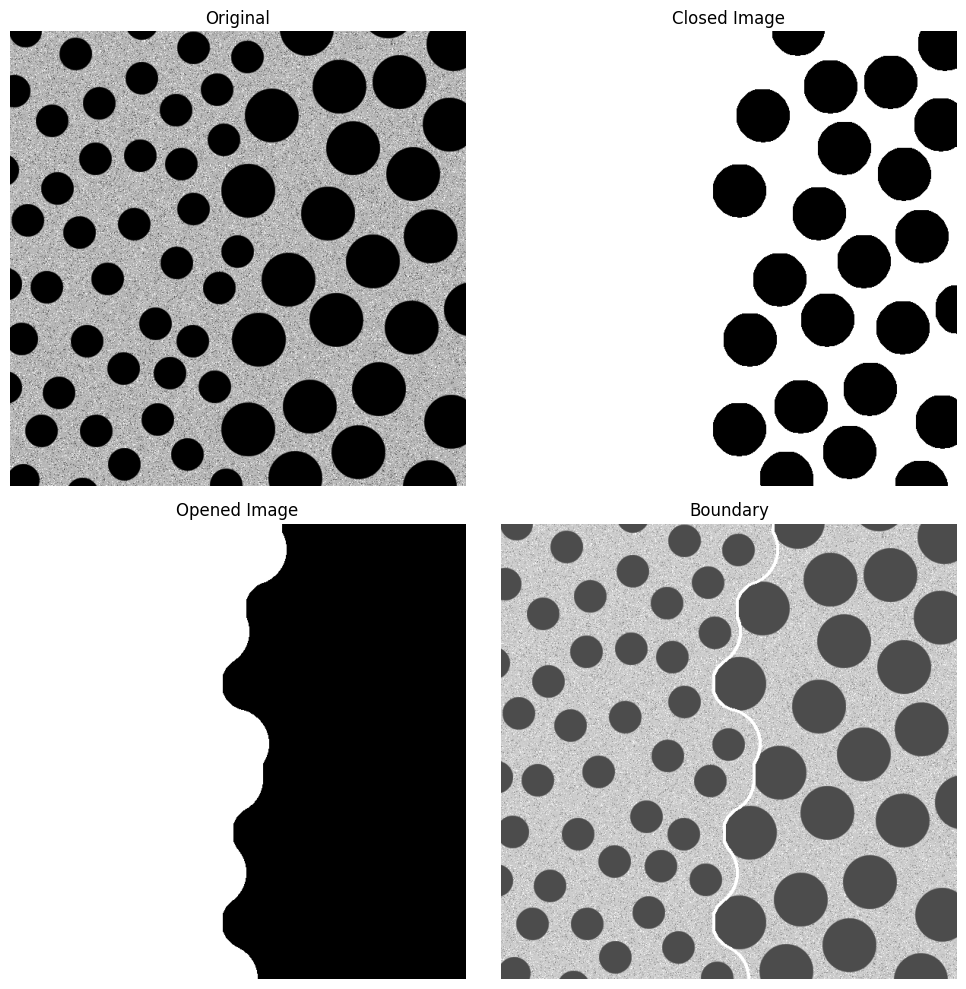

In [11]:
img = cv2.imread('Fig0943.tif', cv2.IMREAD_GRAYSCALE)

# Otsu 이진화
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 작은 blob 제거 (Closing)
kernel_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))
closed_img = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel_close)

# 큰 blob 사이의 영역 제거 (Opening)
kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (90, 90))
opened_img = cv2.morphologyEx(closed_img, cv2.MORPH_OPEN, kernel_open)

# Morphological gradient로 경계선 추출
kernel_grad = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
gradient_img = cv2.morphologyEx(opened_img, cv2.MORPH_GRADIENT, kernel_grad)

# 경계선 겹치기
boundary = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
boundary[gradient_img > 0] = [255, 255, 255]

# 출력
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(2, 2, 2)
plt.imshow(closed_img, cmap='gray')
plt.axis('off')
plt.title('Closed Image')
plt.subplot(2, 2, 3)
plt.imshow(opened_img, cmap='gray')
plt.axis('off')
plt.title('Opened Image')
plt.subplot(2, 2, 4)
plt.imshow(boundary, cmap='gray')
plt.axis('off')
plt.title('Boundary')

plt.tight_layout()
plt.show()